<a href="https://colab.research.google.com/github/rilschultz/CS167Notes/blob/main/Day22_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day22
## Introduction to Convolutional Neural Networks

#### CS167: Machine Learning, Spring 2023

Tuesday, April 18th, 2023

📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vSvFV5Mz0_YZE1d5r3gQ8IMktE4cBAsJIlP30cl2GhEpSO0J-YWV62QokSDz-OcOCsEmxMuKpY0kVlR/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/cs167_s23_syllabus.html) | 📬 [CodePost Login](https://codepost.io/login)

# Admin Stuff

Grading:
- Project #1 is graded
- Still finishing up Quiz #2 and Notebook #5

You should be working on:
- [Notebook #6](https://classroom.github.com/a/pUdpmxBH) is officially released today, due April 25th by 11:59pm 

## Quick Review:

## Multilayer Perceptrons

Neural networks come in many varieties:
- __Convolutional Neural Networks (CNNs)__ are particularly good at computer-vision tasks such as the one we just talked about
- __Recurrent Neural Networks (RNNS)__ are great at working with time-series data--speech recognition, natural language processing, etc.
- __Generative Adversarial Networks (GANs)__ are great at generating new things--art, music, etc. 

The first step in understanding these awesome neural networks is understanding the simplest neural network, a __multilayer perceptron__.

# 💳 Fraud Detection

What kind of machine learning are we doing here? Classifiation or regression?

## Load your data:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

path = '/content/drive/MyDrive/datasets/creditcard.csv'
df = pd.read_csv(path)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
from sklearn.model_selection import train_test_split

x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

Let's build a network that has:
- `input_dim=29`
- 1 hidden layer with 128 neurons
- `relu` for the activation function of the hidden layer
- a `Dense` output layer with a `sigmoid` activation function. 

when you're done, print out the summary of your model. 

In [ ]:
# your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model2 = Sequential() 
#build your model here:
model2.add(Dense(128, activation='relu', input_dim=29))
model2.add(Dense(1, activation='sigmoid')) # binary classification 
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               3840      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile your model with loss='binary_crossentropy', optimizer='adam', and metrics=['accuracy']
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [ ]:
# train your model for 10 epochs, with batch_size=100
hist2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)

Train on 227845 samples, validate on 56962 samples
Epoch 1/10
227845/227845 [==============================] - 8s 35us/sample - loss: 0.0165 - accuracy: 0.9977 - val_loss: 0.0084 - val_accuracy: 0.9991
Epoch 2/10
227845/227845 [==============================] - 7s 31us/sample - loss: 0.0075 - accuracy: 0.9992 - val_loss: 0.0061 - val_accuracy: 0.9993
Epoch 3/10
227845/227845 [==============================] - 7s 31us/sample - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.0066 - val_accuracy: 0.9994
Epoch 4/10
227845/227845 [==============================] - 7s 31us/sample - loss: 0.0072 - accuracy: 0.9992 - val_loss: 0.0064 - val_accuracy: 0.9992
Epoch 5/10
227845/227845 [==============================] - 7s 29us/sample - loss: 0.0062 - accuracy: 0.9993 - val_loss: 0.0051 - val_accuracy: 0.9993
Epoch 6/10
227845/227845 [==============================] - 7s 30us/sample - loss: 0.0051 - accuracy: 0.9993 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 7/10
227845/227845 [=================

Plot the training accuracy and validation acuracy:

[]

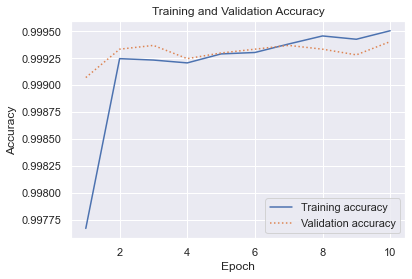

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist2.history['accuracy']
val = hist2.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Visualize the results as a confusion matrix:

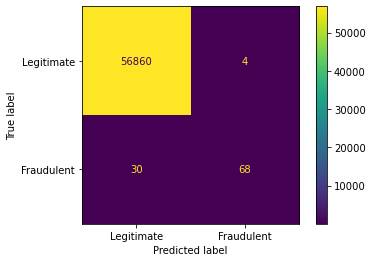

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

sns.reset_orig()
y_predicted = model.predict(x_test) > 0.5 # it will be 1 if > 0.5 and 0 otherwise
labels = ['Legitimate', 'Fraudulent']

cm = confusion_matrix(y_test, y_predicted, labels=df.Class.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

# Neural Network Summary

Neural Networks are effective in __finding non-linear patterns__ in the training data.
- can be applied to __regression__ or __classification__.
- __backpropagation__ tunes the weights over a neural network using __gradient descent__ to iteratively reduce the error in the network. 
- __Overfitting__ the training data is common and is important to avoid.
- The following parameters shoudl be tuned when using neural networks:
    - number of epochs
    - structure of the network (depth, width)
    - activation function
    - eta (learning rate)
    
Practical ML Problems:
- Data Anonymity--dealing with sensitive data (PCA will make data anonymous)
- Imbalanced Datasets


## 🙋 PollEverywhere 

# ✨ New Material

## Resources:
- [Google ML Practicum](https://developers.google.com/machine-learning/practica/image-classification)
- [Applied Machine Learning Chapter 10](https://github.com/jeffprosise/Applied-Machine-Learning/tree/main/Chapter%2010)
- [d2l.ai Chapter 7](https://d2l.ai/chapter_convolutional-neural-networks/index.html)

### Data:
- Go ahead and download `arctic-wildlife.zip` from Bb.
- Put it in your Google Drive
- Use ZipExtractor to unzip (extract) the data into your Google Drive. 
- This will take 5-10 minutes.

# 💬 Group Exercise: 🦢

If you had to describe to a computer how to recognize swans 🦢, where would you start?


<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_swan1.png?raw=1" width=400/>
</div>

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_swan2.png?raw=1" width=800/>
</div>

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_swan3.png?raw=1" width=800/>
</div>

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_swan4.png?raw=1" width=800/>
</div>

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_swan5.png?raw=1" width=800/>
</div>

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_swan_hardmode.png?raw=1" width=800/>
</div>

# Traditional Neural Networks:
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day18_mlp1.png?raw=1" width=300/>
</div>

Feedforward neural networks don't do a very good job learning image data. 
- image sizes can get out of hand quickly (224 x 224 x 3 = 150528 input nodes for a small color image)

- Not translation invariant:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_dog.png?raw=1" width=700/>
</div>

# Convolutional Neural Networks

__convolutional neural networks (CNNs)__ are a specialized kind of neural network that perform particularly well on image data. 

__computer vision__ is the subdiscipline of machine learning that deals with image data. 

- CNNs extract features from images and pooling layers to downsize images so features can be detected at various resolutions. 

## Common computer vision tasks include:
- Image Classification (Polar Bear, Walrus, Arctic Fox)
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_wildlife.png?raw=1" width=800/>
</div>

- Object Detection [img source](https://www.mathworks.com/discovery/object-detection.html)
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_object_detection.png?raw=1" width=600/>
</div>

- Image Sementation
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_img_seg.jpeg?raw=1" width=400/>
</div>

- Automatic Captioning (this is a joint Computer Vision and Natural Language Processing task) [[img src]](https://cs.stanford.edu/people/karpathy/sfmltalk.pdf)
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_image_captioning.png?raw=1" width=700/>
</div>

# Image Data
Image data is represented as a two-dimensional grid of pixels, either grayscale (monochromatic) or color (RBG). 
- each pixel corresponds to one or multiple numeric values: if it's grayscale, it is one number, if it's color, it corresponds to 3 numbers (a red, a green and a blue value). 

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_rgb.png?raw=1" width=500/>
</div>


<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_rgb_exp.png?raw=1" width=800/>
</div>

# Convolutional Neural Networks: Spatial Relations

Pixels in images have a very stron __local dependence__.
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_local.png?raw=1" width=800/>
</div>


## Local Dependence: The math

We can take advantage of the idea that pixels exhibit local dependence by using the namesake of CNNs, the __convolution__. 

We need to understand a little bit of linear algebra to understand a convolution.

Let's start with the __dot product__ ($a \cdot b$): takes two equal length sequences of numbesr (matrix/array) and returns a single number (aka scalar product).  

$a=[2,4,6]$ <br>
$b=[1,2,3]$ <br>

$a\cdot b = (2*1) + (4*2) + (6*3)$ <br>
$ a\cdot b = 2 + 8 + 18 $ <br>
$ a\cdot b = 28$

In order to capture the local dependence of images, we use __convolutional filters__. 

A __convolutional filter__, aka kernel:
- is smaller than the input data (usually 3x3 or 5x5)
- uses dot product multiplcation between a piece of the input that is the size of the filter and the filter.
- Scans over the image from the upper left to the bottom right. 

# What the heck is a convolution?

Let's take a look at the whiteboard:
- 1D convolution ($\ast$) example:

$a = [1,5,3,7,5,9,14]$ <br>
$b = [\frac{1}{3},\frac{1}{3},\frac{1}{3}]$
<br><br>
$ a \ast b = [3,5,5,7,7,10]$

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_local_avg.png?raw=1" width=800/>
</div>

![convolution](https://media3.giphy.com/media/i4NjAwytgIRDW/giphy.gif)

![conv](https://res.cloudinary.com/practicaldev/image/fetch/s--jmMWlgmi--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://i.ibb.co/KrvpqL7/cnn-convoluted.png)


![convolution](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

# 💬 Group Exercise:

What will the following convolutions result in?


<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_conv_ex1.png?raw=1" width=600/>
</div>


# Convolution Dimension Math

The dimensions of the output of a convolution are _usually_ different than the input dimension of the convolution. 

The following equation demonstrates how to calculate the output size of a convolution:

$$output dim  = [ (W - K + 2P) / S] + 1$$

Where:
- $W$ is the input size
- $K$ is the kernel size
- $P$ is the padding
- $S$ is the stride

## Padding and Stride

__Padding__ refers to adding a boundary of zeros to your image. 

__Stride__ refers to how many steps to the right/down we take when we move on to the next dot product. The bigger the stride, the smaller the output dimensions.

Can anyone think why we might want to use padding?
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_padding.png?raw=1" width=800/>
</div>


## Group Exercise: 
What will the size of the output of the following convolution be? (5x5)* (3x3)
- what if the dimensions weren't equal?
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_conv_math_ex.png?raw=1" width=800/>
</div>

# Max Pooling Layer:

Image data can get really computationally inefficient, really quickly. To avoid this, we often toss in a layer that helps us to __summarize__ and __downsample__ the data. 

The most common layer after a convolutional layer is called a __Max Pooling Layer__, and it's goal is to locally summarize the convolution. 

It performs something like a convolution, but rather than taking the dot product, it takes the maximum element in the filter area. 

![max-pooling](https://developers.google.com/static/machine-learning/practica/image-classification/images/maxpool_animation.gif)

# Pulling it all together:

Okay, so we've talked about __image data__, __dot product__, __convolutions__, __max pooling__, and I've promised that we'll be able to pull off some computer vision. Let's connect the dots.

Things to notice:
- input is an image (in this case a color image, so 3 channels--red,green, and blue)
- There are several filters, not just one.
- `Conv2D` layers with `ReLU` are often followed by `maxpool` 
- Towards the end of the model, we switch to fully connected (`Dense`) layer
- We have as many output nodes as we have classes to predict.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_cnn_architecture.svg?raw=1" width=800/>
</div>

[[img src](https://developers.google.com/machine-learning/practica/image-classification)]

# Traditional NN comparison

So... in traditional neural networks, where is all of the 'intelligence' stored? (i.e. what parameters do we _learn_?)

_the WEIGHTS_!

In CNNs, what parameters should we be training/learning?

# CNNs

__Big idea__: Different kernels/filters can be used to extract specific information from the original image

__Bigger idea__: Instead of using manually made kernels for feature extraction, through __deep CNNs we can learn these kernel values__ (just like the weights of a traditional NN). These kernels can extract latent features.
- In MLP the way we learn is by chaging the _weights_.
- In CNNs, the way we learn is by changing the _values in the filters/kernels_.


<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_tesla_cnn.png?raw=1" width=800/>
</div>

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_cat_cnn.png?raw=1" width=800/>
</div>

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_filters.png?raw=1" width=800/>
</div>

## A Simple Example: MNIST

The MNIST dataset is a famous dataset used to train ML models and neural networks to recognize handwriten digits. Things to know:
- each digit in the dataset consists of a 28x28 array of numbers representing pixel values from 0 to 255.
- the dataset is included as part of Keras/Tensorflow.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_mnist.png?raw=1" width=800/>
</div>

In [4]:
from keras.datasets import mnist

(train_images, y_train), (test_images, y_test) = mnist.load_data()
print(f'train_images: {train_images.shape}')
print(f'y_train: {y_train.shape}')
print(f'test_images: {test_images.shape}')
print(f'y_test: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
train_images: (60000, 28, 28)
y_train: (60000,)
test_images: (10000, 28, 28)
y_test: (10000,)


Plot the first 50 images and show the corresponding labels.

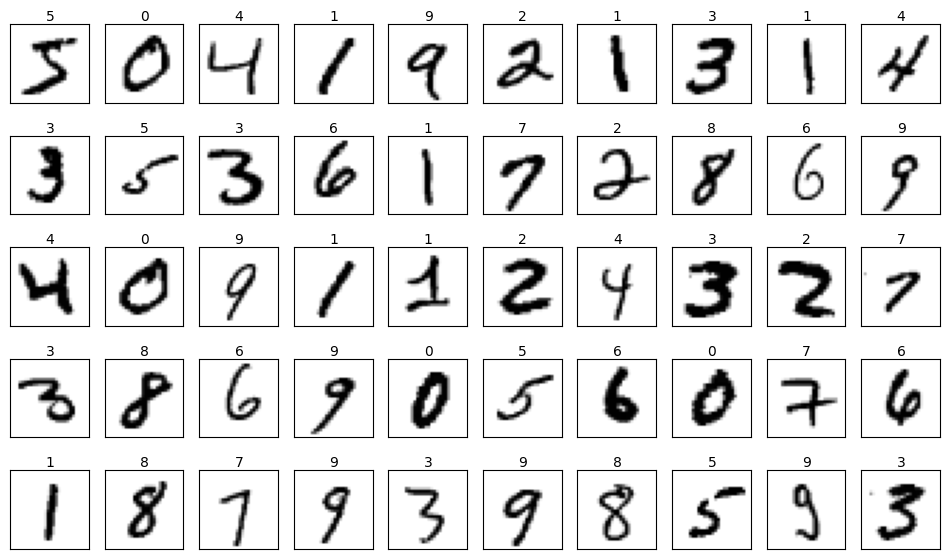

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(y_train[i]), transform=ax.transAxes)

Reshape the image data for input to a CNN and normalize the pixel values by dividing them by 255:

In [6]:
x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255

Create a convolutional neural network with a `softmax` activation function in the output layer with ______ nodes:

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D(2, 2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary(line_length=80)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d (Conv2D)                    (None, 26, 26, 32)              320         
                                                                                
 max_pooling2d (MaxPooling2D)       (None, 13, 13, 32)              0           
                                                                                
 conv2d_1 (Conv2D)                  (None, 11, 11, 64)              18496       
                                                                                
 max_pooling2d_1 (MaxPooling2D)     (None, 5, 5, 64)                0           
                                                                                
 flatten (Flatten)                  (None, 1600)                    0           
                                                                                
 dense (

In [1]:
hist1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)

NameError: ignored

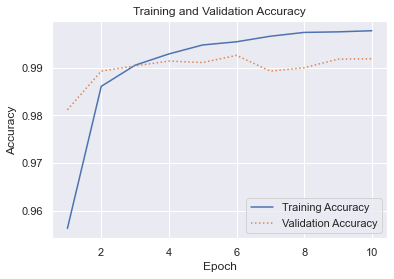

In [ ]:
import seaborn as sns
sns.set()

acc = hist1.history['accuracy']
val_acc = hist1.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

How accurate is the model?

In [ ]:
scores = model1.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {scores[1]:.1%}')

Accuracy: 99.2%


Show one of the test images:

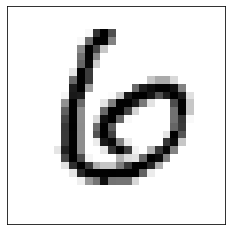

In [ ]:
sns.reset_orig()
test_image = test_images[11]
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(test_image, cmap=plt.cm.gray_r)

Use the test image to make a prediction:

In [ ]:
x = test_image.reshape(1, 28, 28, 1) / 255
model1.predict(x)

array([[2.7625933e-09, 9.8990803e-16, 5.9714120e-15, 3.2321996e-18,
        5.3268120e-14, 4.8728187e-13, 1.0000000e+00, 4.0335544e-18,
        8.6856125e-13, 5.4448494e-18]], dtype=float32)

Get the predicted class:

In [ ]:
import numpy as np

predicted_class = np.argmax(model1.predict(x), axis=1)[0]
print('Looks like a ' + str(predicted_class) + '!')

Looks like a 6!


# Another Example: Arctic Wildlife

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_wildlife.png?raw=1" width=800/>
</div>

## Load training and testing images
The first step is to load the images that will be used for training and testing and to label theimages with: 
- 0 for Arctic Foxes
- 1 for Polar Bears
- 2 for Walruses



In [ ]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
 
def load_images_from_path(path, label):
    images, labels = [], []
 
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
         
    return images, labels
 
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
 
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
 
x_train, y_train, x_test, y_test = [], [], [], []

## We've got some foxes

Load in a few imaes and show the first fews

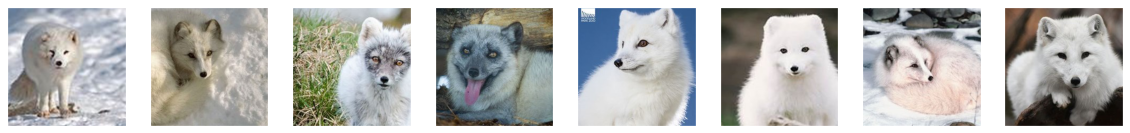

In [ ]:
images, labels = load_images_from_path('datasets/Wildlife/train/arctic_fox', 0)
show_images(images)
    
x_train += images
y_train += labels

## Polar Bears:

Let's see some brrrrrrs

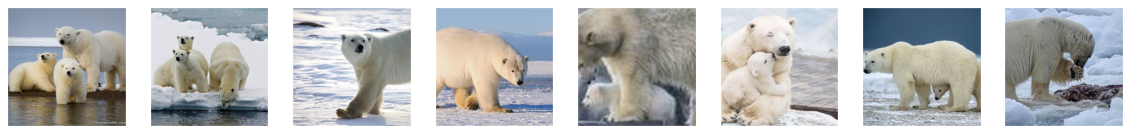

In [ ]:
images, labels = load_images_from_path('datasets/Wildlife/train/polar_bear', 1)
show_images(images)
    
x_train += images
y_train += labels

## And... Walruses:

Here is your daily dose of walruses

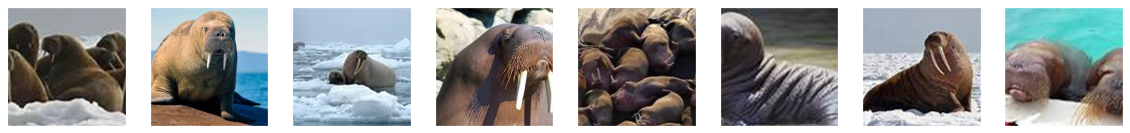

In [ ]:
images, labels = load_images_from_path('datasets/Wildlife/train/walrus', 2)
show_images(images)

x_train += images
y_train += labels

## Let's see what our Test Set looks like:

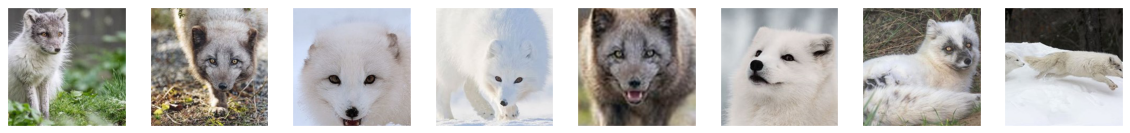

In [ ]:
images, labels = load_images_from_path('datasets/Wildlife/test/arctic_fox', 0)
show_images(images)
    
x_test += images
y_test += labels

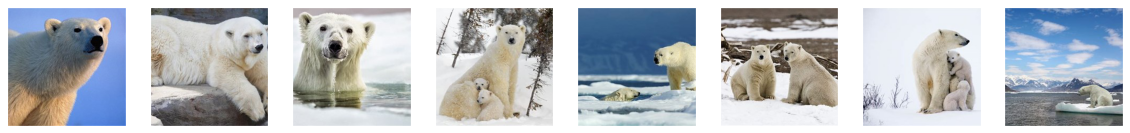

In [ ]:
images, labels = load_images_from_path('datasets/Wildlife/test/polar_bear', 1)
show_images(images)
    
x_test += images
y_test += labels

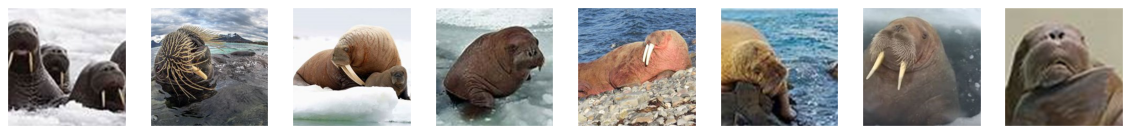

In [ ]:
images, labels = load_images_from_path('datasets/Wildlife/test/walrus', 2)
show_images(images)
    
x_test += images
y_test += labels

## Preprocess the training and testing images
Pixels range in values from 0-255, so dividing by 255 will essentially normalize the pixel values.

In [ ]:
import numpy as np
 
x_train = np.array(x_train) / 255 # normalize pixel values
x_test = np.array(x_test) / 255

y_train = np.array(y_train)
y_test = np.array(y_test)

## Build and train a CNN

Keras makes it easy to build and train CNNs using classes such as Conv2d and MaxPooling2D. 

This model has:
- 5 convolution and pooling layers
- one pair of fully connected layers for classification

Quick Quiz: 
- How many neurons should be in the output layer?
- What should the activation of the output layer be?

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

Model: "sequential_3"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_12 (Conv2D)                  (None, 222, 222, 32)            896         
________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D)     (None, 111, 111, 32)            0           
________________________________________________________________________________
conv2d_13 (Conv2D)                  (None, 109, 109, 64)            18496       
________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D)     (None, 54, 54, 64)              0           
________________________________________________________________________________
conv2d_14 (Conv2D)                  (None, 52, 52, 64)              36928       
________________________________________________________________________________
max_po

In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)

Train on 300 samples, validate on 120 samples
Epoch 1/20
300/300 [==============================] - 12s 41ms/sample - loss: 1.1208 - accuracy: 0.3533 - val_loss: 1.0647 - val_accuracy: 0.5667
Epoch 2/20
300/300 [==============================] - 10s 34ms/sample - loss: 0.9956 - accuracy: 0.5067 - val_loss: 1.0245 - val_accuracy: 0.4000
Epoch 3/20
300/300 [==============================] - 10s 34ms/sample - loss: 0.9061 - accuracy: 0.5567 - val_loss: 0.8567 - val_accuracy: 0.5833
Epoch 4/20
300/300 [==============================] - 10s 33ms/sample - loss: 0.7653 - accuracy: 0.6400 - val_loss: 0.8701 - val_accuracy: 0.5750
Epoch 5/20
300/300 [==============================] - 10s 34ms/sample - loss: 0.7157 - accuracy: 0.6733 - val_loss: 0.7871 - val_accuracy: 0.6250
Epoch 6/20
300/300 [==============================] - 10s 33ms/sample - loss: 0.7078 - accuracy: 0.6767 - val_loss: 0.7294 - val_accuracy: 0.6250
Epoch 7/20
300/300 [==============================] - 11s 35ms/sample - loss: 

How well did the CNN train? Let's plot the training accuracy and vlaidation accuracy for each epoch.

[]

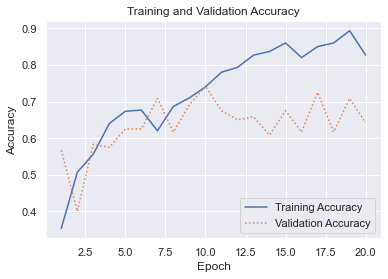

In [ ]:
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()